In [1]:
import cv2

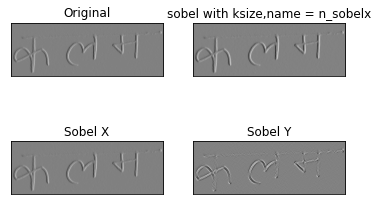

In [17]:
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('1.png',0)
img = cv2.medianBlur(img,5)

# laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,)
n_sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize = 5)
img = cv2.normalize(src=sobelx, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# abs_sobel64f = np.absolute(sobelx64f)
# n_sobelx = np.uint8(abs_sobel64f)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,)
# print (n_sobelx.dtype)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
# plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
# plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(n_sobelx,cmap = 'gray')
plt.title('sobel with ksize,name = n_sobelx'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

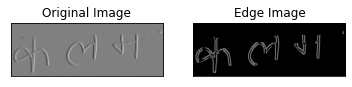

In [28]:
edges = cv2.Canny(img,50,240)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
cv2.imshow("")

no of contours = 45


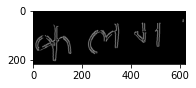

In [42]:
kernel=np.ones((1,1),np.uint8)
erod = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel, iterations = 4)
erod1 = erod
cv2.imshow("im",erod1)
contours,_ = cv2.findContours(erod,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print("no of contours = "+ str(len(contours)))
# img = cv2.drawContours(erod, contours, -1, (0,255,0), 3)
# plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.subplot(2,2,2),plt.imshow(erod1,cmap = 'gray')
plt.show()

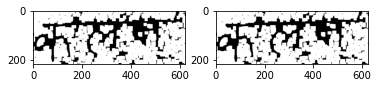

In [12]:

kernel=np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations = 3)
# img=cv2.erode(img,kernel,iterations=1)
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
img = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 3)
c